# Homework 4: Data Visualization
- **Name**:  Suyash Rajesh Arlimar
- **UB Username**: suyashra
- **UB Person Number**:  50475246

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

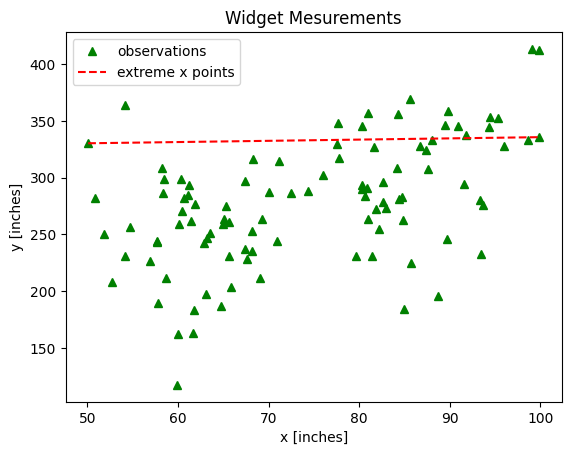

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('scatter_data.csv',comment='%',names=['x','y'])
#getting x and y column for x axis and y axis
x = data['x']
y = data['y']
# plot with green traingles
plt.plot(x, y, 'g^', label='observations')
# minimum  and maximum x cordinates at left and right
left_x = min(x)
right_x = max(x)

left_y = y[x.idxmin()]
right_y = y[x.idxmax()]
plt.plot([left_x, right_x], [left_y, right_y], 'r--', label='extreme x points')
plt.title('Widget Mesurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.legend()
plt.show()

### Problem 2 - Histogram

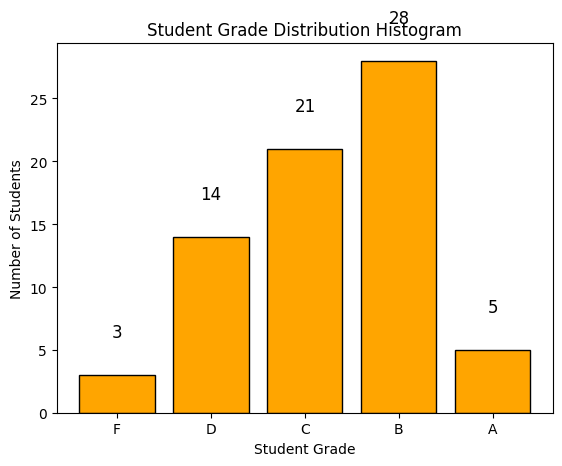

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('student_grades.csv',comment='%',names=['studentID','avgScore'])
scores = data['avgScore']
scorebins = [0, 60, 70, 80, 90, 100]
gradelabels = ['F', 'D', 'C', 'B', 'A']
grade_counts = [len([score for score in scores if score >= scorebins[i] and score < scorebins[i+1]]) for i in range(len(scorebins) - 1)] 
plt.bar(np.arange(len(gradelabels)), grade_counts, color='orange', edgecolor='black')
plt.xticks(np.arange(len(gradelabels)), gradelabels)

for i, count in enumerate(grade_counts):
    plt.text(i, count + 3, str(count), fontsize=12, color='black', ha='center')
    
plt.xlabel('Student Grade')
plt.ylabel('Number of Students')
plt.title('Student Grade Distribution Histogram')
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

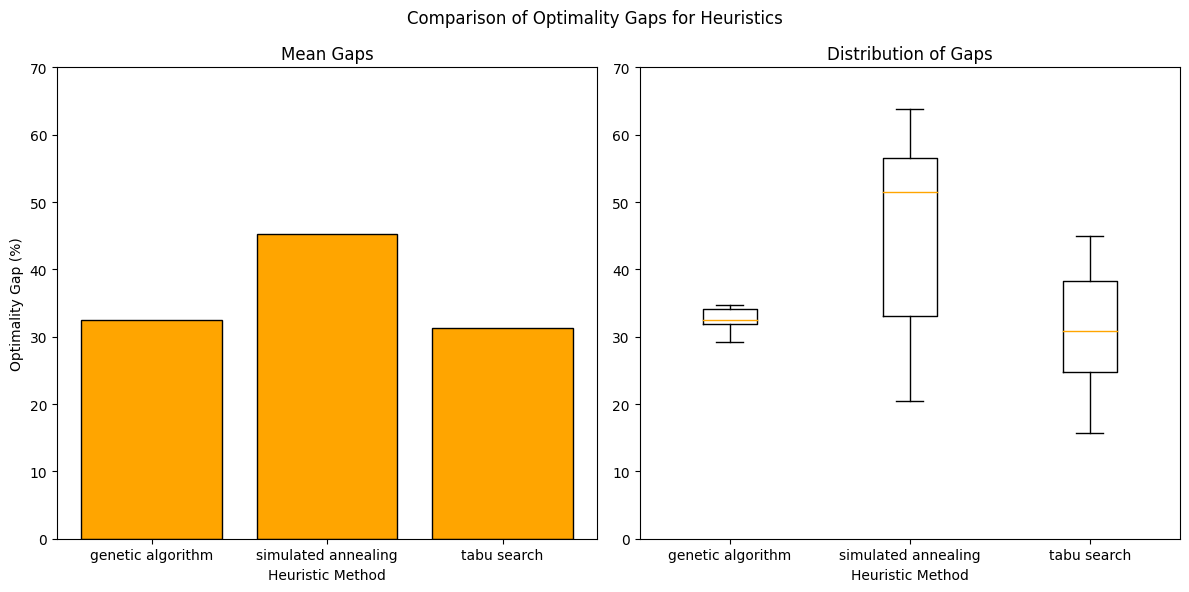

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('solution_data.csv',comment='%',names=['Problem','SolnMethod','Value'])
data.columns = data.columns.str.replace('%', '')
data['SolnMethod'] = data['SolnMethod'].str.strip('|')
data['OptimalOFV'] = data.groupby('Problem')['Value'].transform(lambda x: x.loc[data['SolnMethod'] == 'optimal'].iloc[0])
data['optimality_gap'] = (data['OptimalOFV'] - data['Value']) / data['OptimalOFV'] * 100
filtered_data = data[data['SolnMethod'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(filtered_data['SolnMethod'].unique(), filtered_data.groupby('SolnMethod')['optimality_gap'].mean(), color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_yticks(range(0, int(filtered_data['optimality_gap'].max()) + 10, 10))

axs[1].boxplot([filtered_data[filtered_data['SolnMethod'] == method]['optimality_gap'] for method in filtered_data['SolnMethod'].unique()], labels=filtered_data['SolnMethod'].unique(), medianprops=dict(color='orange'))

axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_yticks(range(0, int(filtered_data['optimality_gap'].max()) + 10, 10))

ylim = axs[1].get_ylim()
axs[0].set_ylim(ylim)

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()

--- 
## Part 2 - Explore New Plot Types

Here we are going to see student performance data. jointplot is combination of scatter plot, regression plot and hist plot. so we can 3 plots combinely. Here math score is x variable and reading score is y variable

- **URL of Example Code**:  https://seaborn.pydata.org/examples/regression_marginals.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/

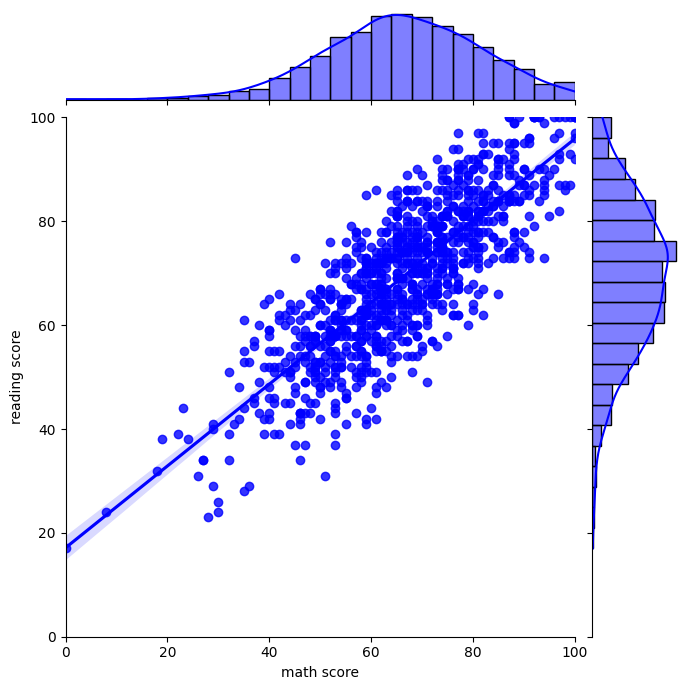

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/suyasharlimar/data/main/StudentsPerformance.csv")
sns.jointplot(x="math score", y="reading score", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, 100), ylim=(0, 100),
                  color="b", height=7)

This joint plot helps to better comprehend the relationship and distribution between the "math score" and "reading score" in the dataset by combining scatter plots, regression lines, and histograms to create a thorough depiction of the correlation. Here regression line shows, how data is fitted on linear model, scatter plot shows variation of data and historgram shows how data is distributed.we can change size by xlim and ylim variable, also we can change color by color variable.